In [32]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.plotting import TEAM_COLORS

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/__init__.py:82: FutureWarning: TEAM_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


In [33]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Miami Grand Prix', 'R')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req   

In [34]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
3,0 days 01:04:20.929000,VER,1,0 days 00:01:32.569000,4.0,NaN,NaT,NaT,0 days 00:00:31.185000,0 days 00:00:35.126000,...,True,Red Bull Racing,0 days 01:02:48.360000,2025-05-04 20:09:15.201,1,1.0,False,,False,True
4,0 days 01:05:53.062000,VER,1,0 days 00:01:32.133000,5.0,NaN,NaT,NaT,0 days 00:00:31.182000,0 days 00:00:34.799000,...,True,Red Bull Racing,0 days 01:04:20.929000,2025-05-04 20:10:47.770,1,1.0,False,,False,True
5,0 days 01:07:25.158000,VER,1,0 days 00:01:32.096000,6.0,NaN,NaT,NaT,0 days 00:00:31.075000,0 days 00:00:34.815000,...,True,Red Bull Racing,0 days 01:05:53.062000,2025-05-04 20:12:19.903,1,1.0,False,,False,True
6,0 days 01:08:57.241000,VER,1,0 days 00:01:32.083000,7.0,NaN,NaT,NaT,0 days 00:00:31.076000,0 days 00:00:34.867000,...,True,Red Bull Racing,0 days 01:07:25.158000,2025-05-04 20:13:51.999,1,1.0,False,,False,True
7,0 days 01:10:29.824000,VER,1,0 days 00:01:32.583000,8.0,NaN,NaT,NaT,0 days 00:00:31.420000,0 days 00:00:35.021000,...,True,Red Bull Racing,0 days 01:08:57.241000,2025-05-04 20:15:24.082,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0 days 01:34:12.912000,BEA,87,0 days 00:01:33.088000,23.0,NaN,NaT,NaT,0 days 00:00:31.179000,0 days 00:00:35.510000,...,True,Haas F1 Team,0 days 01:32:39.824000,2025-05-04 20:39:06.665,1,13.0,False,,False,True
1000,0 days 01:35:45.592000,BEA,87,0 days 00:01:32.680000,24.0,1.0,NaT,NaT,0 days 00:00:31.083000,0 days 00:00:35.480000,...,True,Haas F1 Team,0 days 01:34:12.912000,2025-05-04 20:40:39.753,1,12.0,False,,False,True
1001,0 days 01:37:18.646000,BEA,87,0 days 00:01:33.054000,25.0,1.0,NaT,NaT,0 days 00:00:31.073000,0 days 00:00:35.848000,...,True,Haas F1 Team,0 days 01:35:45.592000,2025-05-04 20:42:12.433,1,12.0,False,,False,True
1002,0 days 01:38:52.786000,BEA,87,0 days 00:01:34.140000,26.0,1.0,NaT,NaT,0 days 00:00:32.323000,0 days 00:00:35.617000,...,True,Haas F1 Team,0 days 01:37:18.646000,2025-05-04 20:43:45.487,1,12.0,False,,False,True


In [35]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [36]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.

    Parameters:
    - td: pd.Timedelta

    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [37]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    # Clean up team names by stripping extra spaces
    team = team.strip()

    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            # Use the internal TEAM_COLORS dictionary for the team color
            return TEAM_COLORS[team.lower()]  # Ensure team name matches the expected format
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

# Create the palette, ensuring teams are processed correctly
team_palette = {team: get_team_color(team) for team in team_order}

In [38]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [39]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

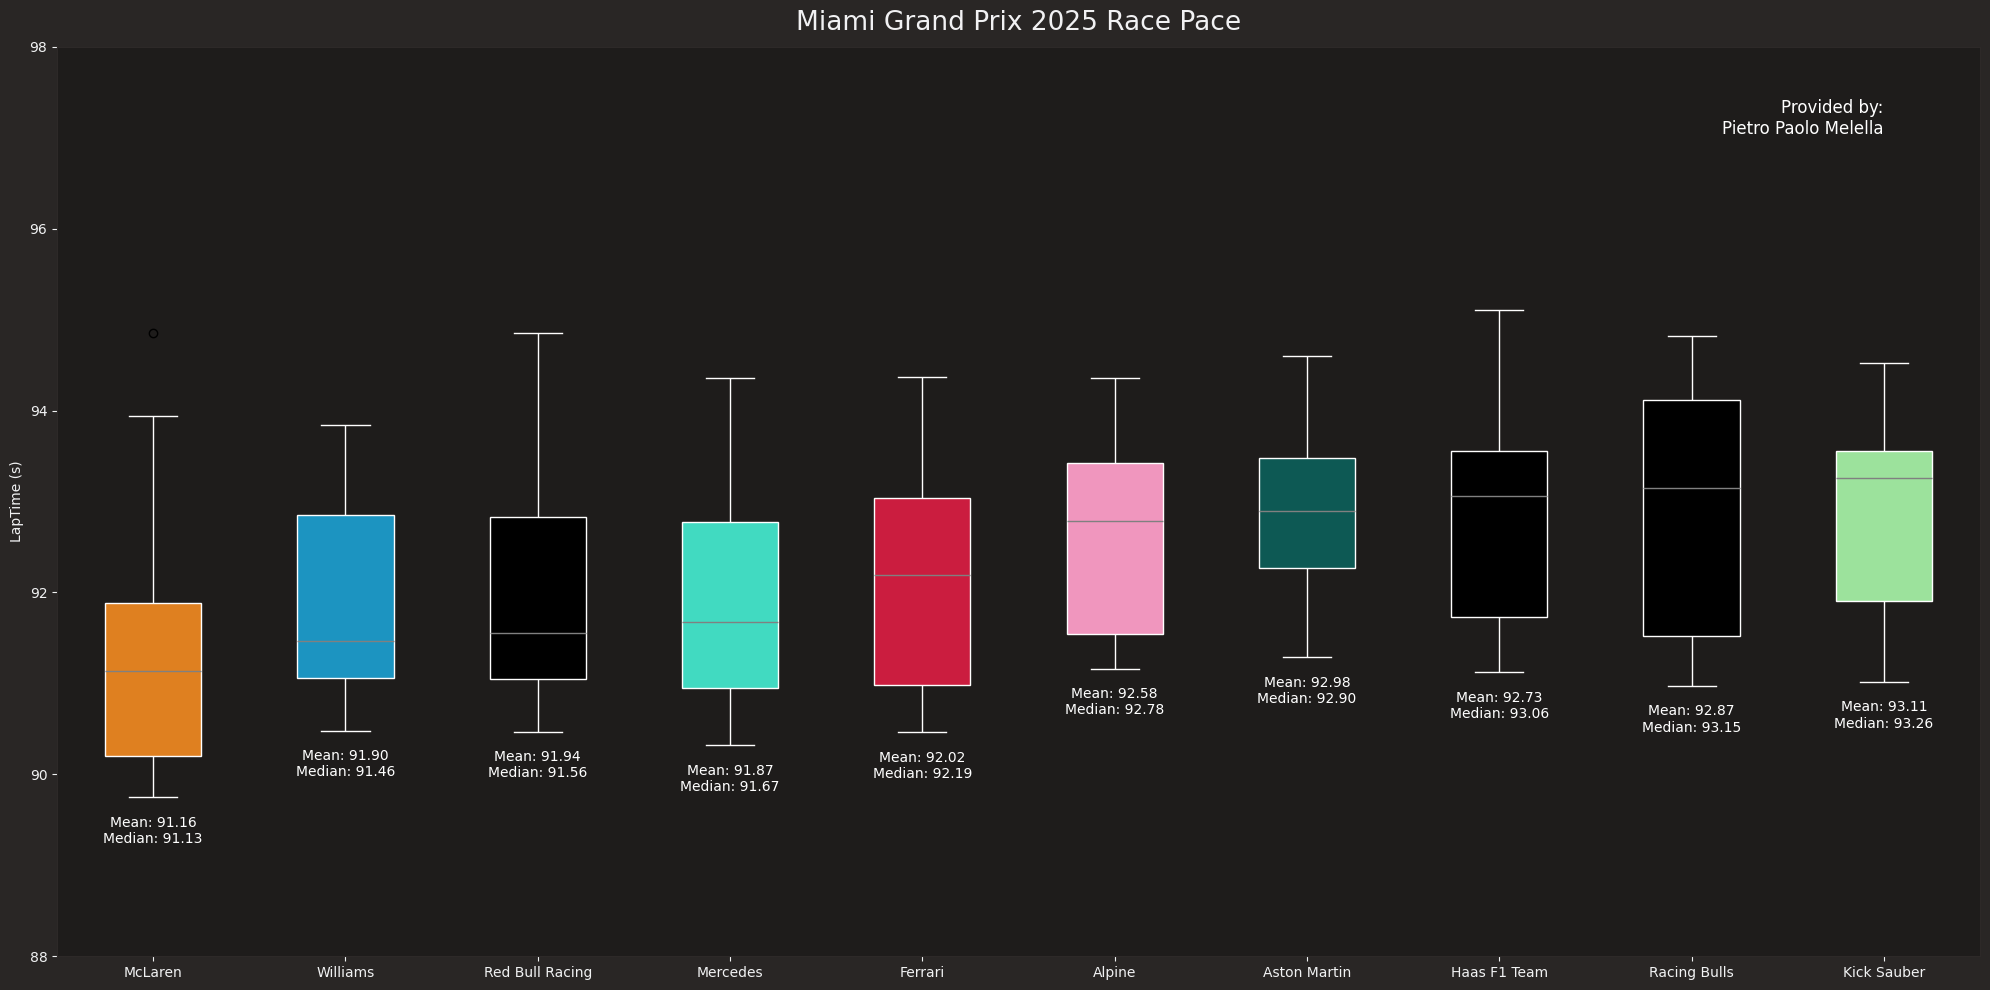

In [40]:
# First, calculate the mean and median times for each team
transformed_laps.reset_index(drop=True, inplace=True)

team_stats = transformed_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(88, 98)  # Example range, adjust based on your data

# Loop through the teams and add mean and median text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

# Update plot title and remove grid
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace")
plt.grid(visible=False)

# Add source text in a more readable position
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Remove redundant x-label
ax.set(xlabel=None)

# Tight layout and display
plt.tight_layout()
plt.show()

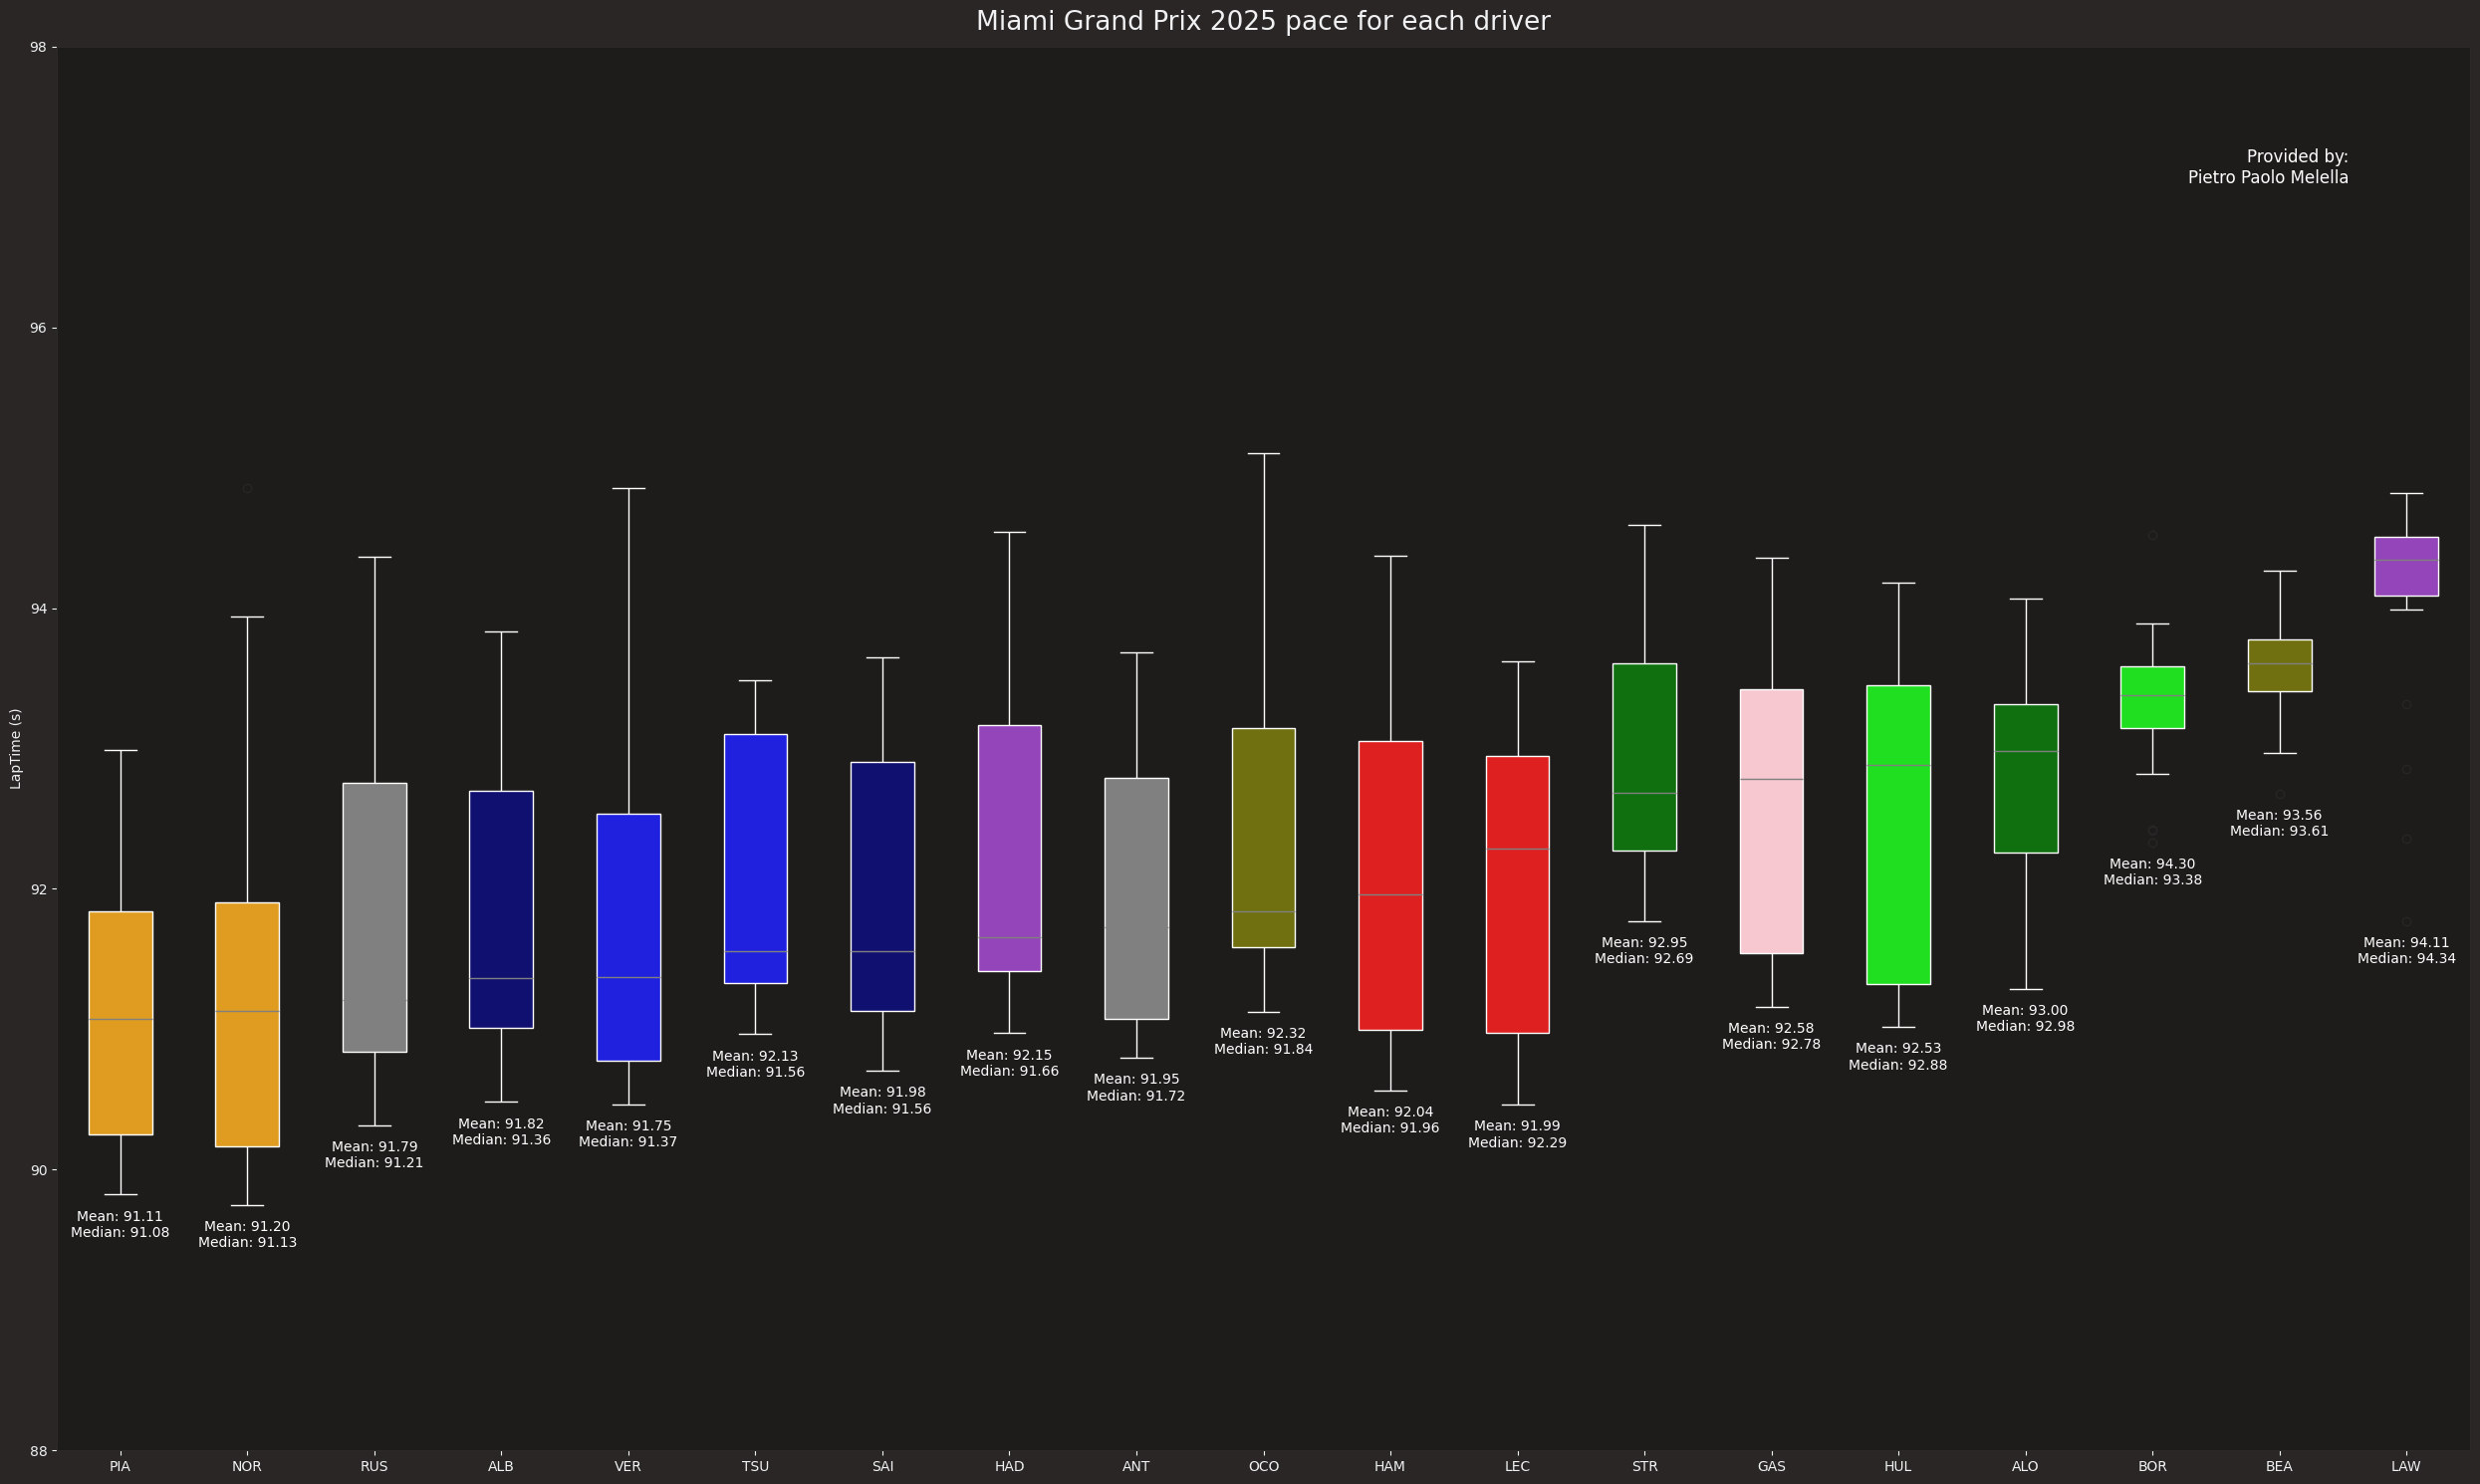

In [41]:
drivers_stats = transformed_laps.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)


# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )


plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver")
plt.grid(visible=False)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(88,98)  # Example range, adjust based on your data
# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

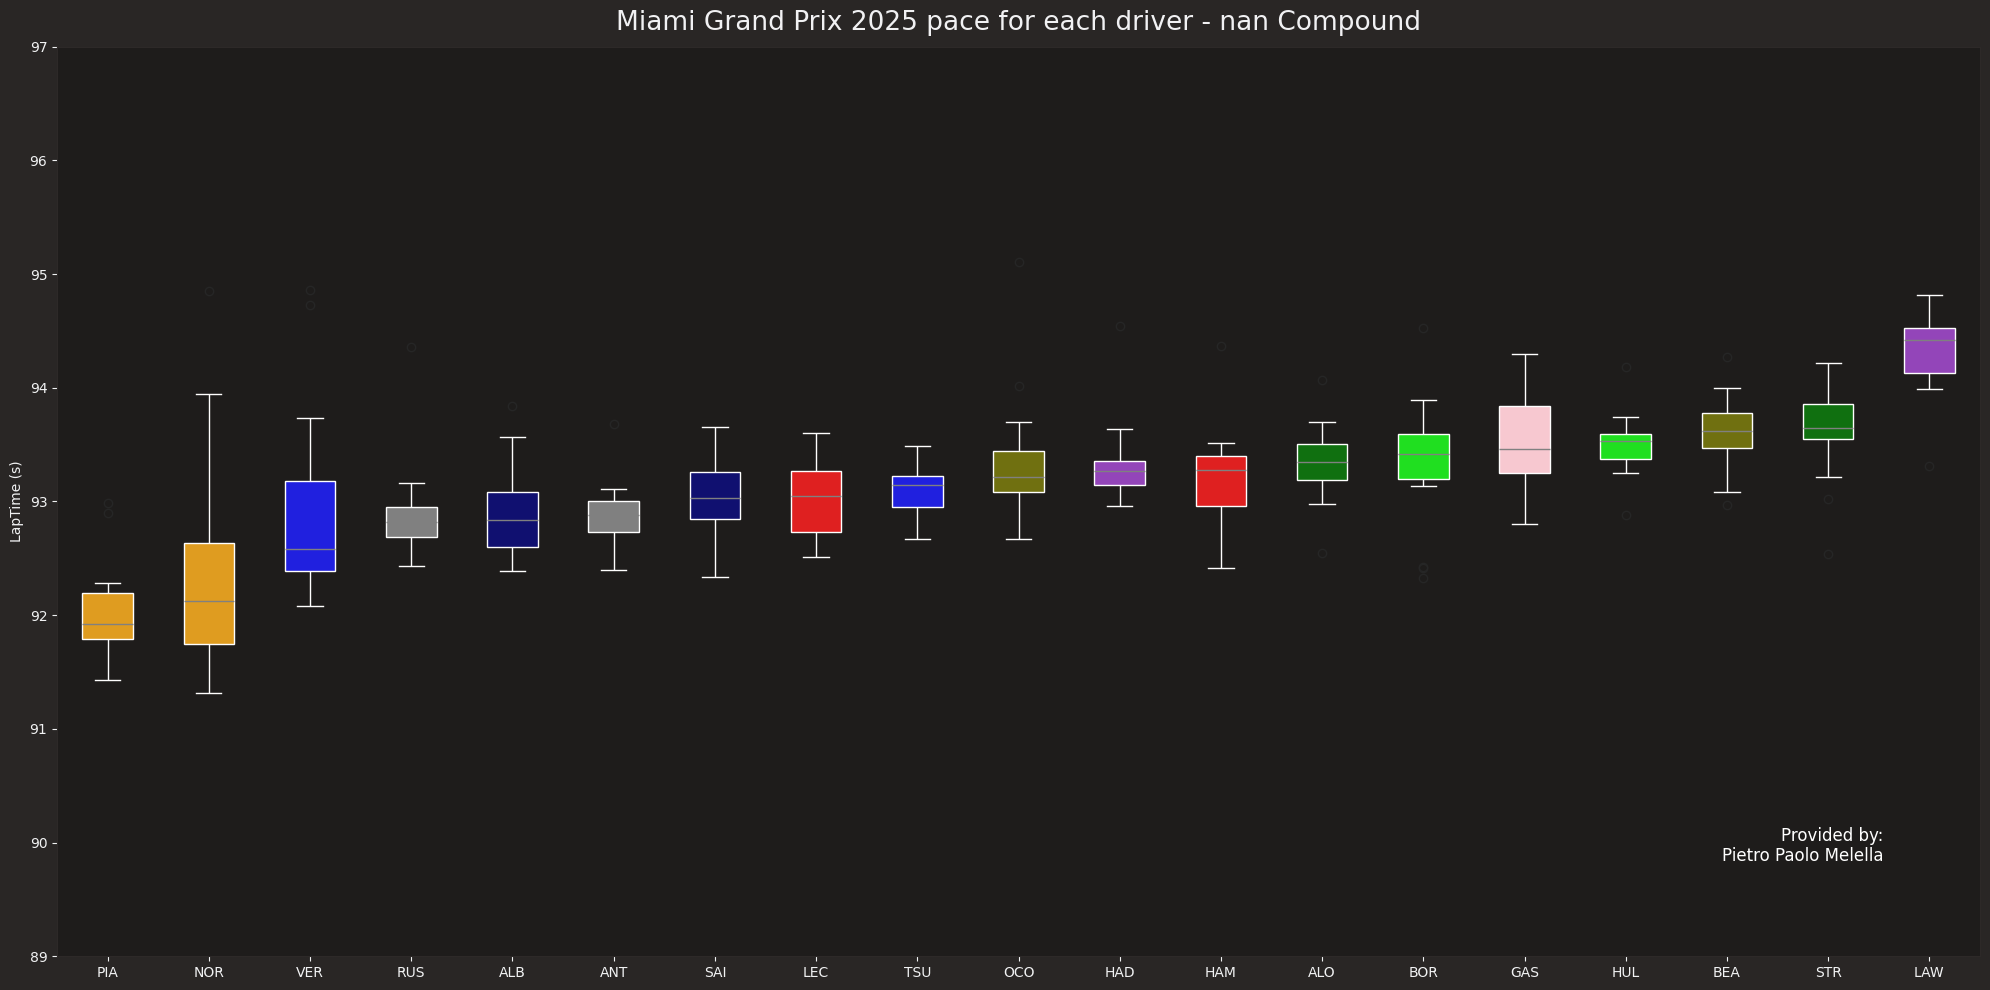

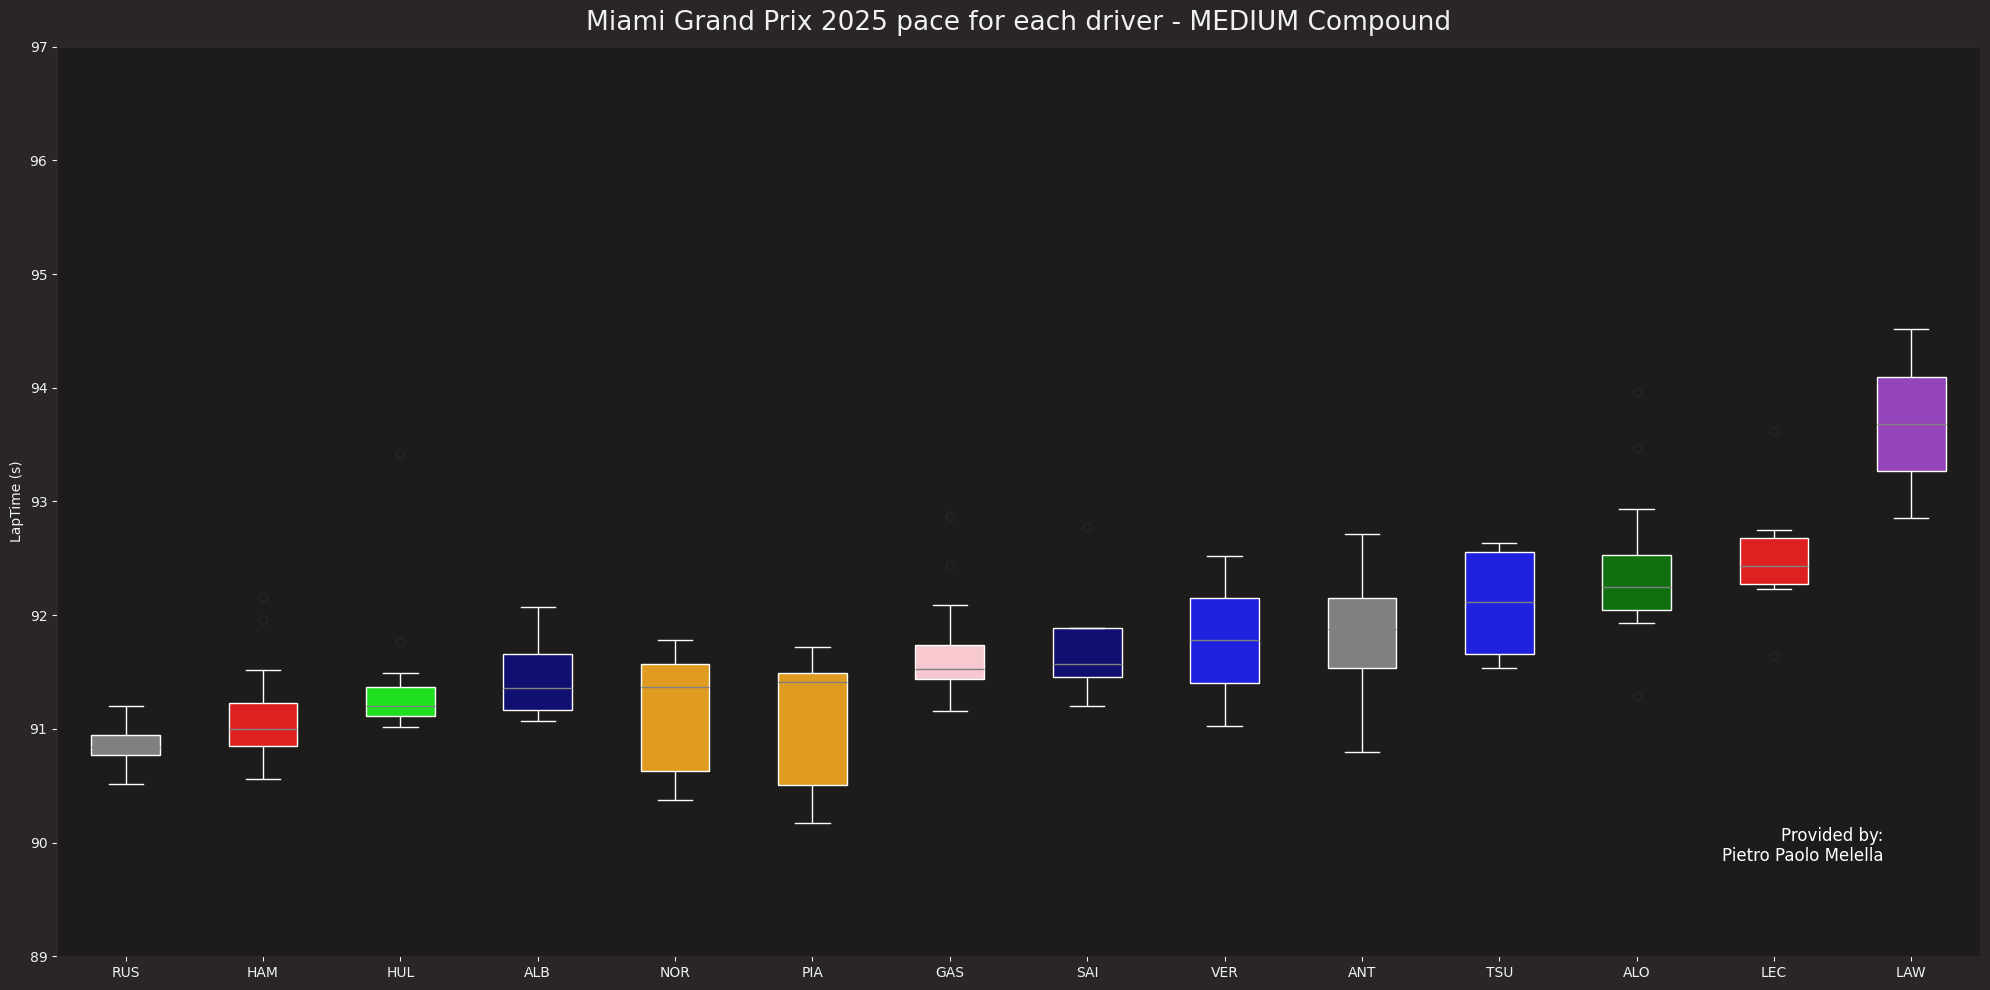

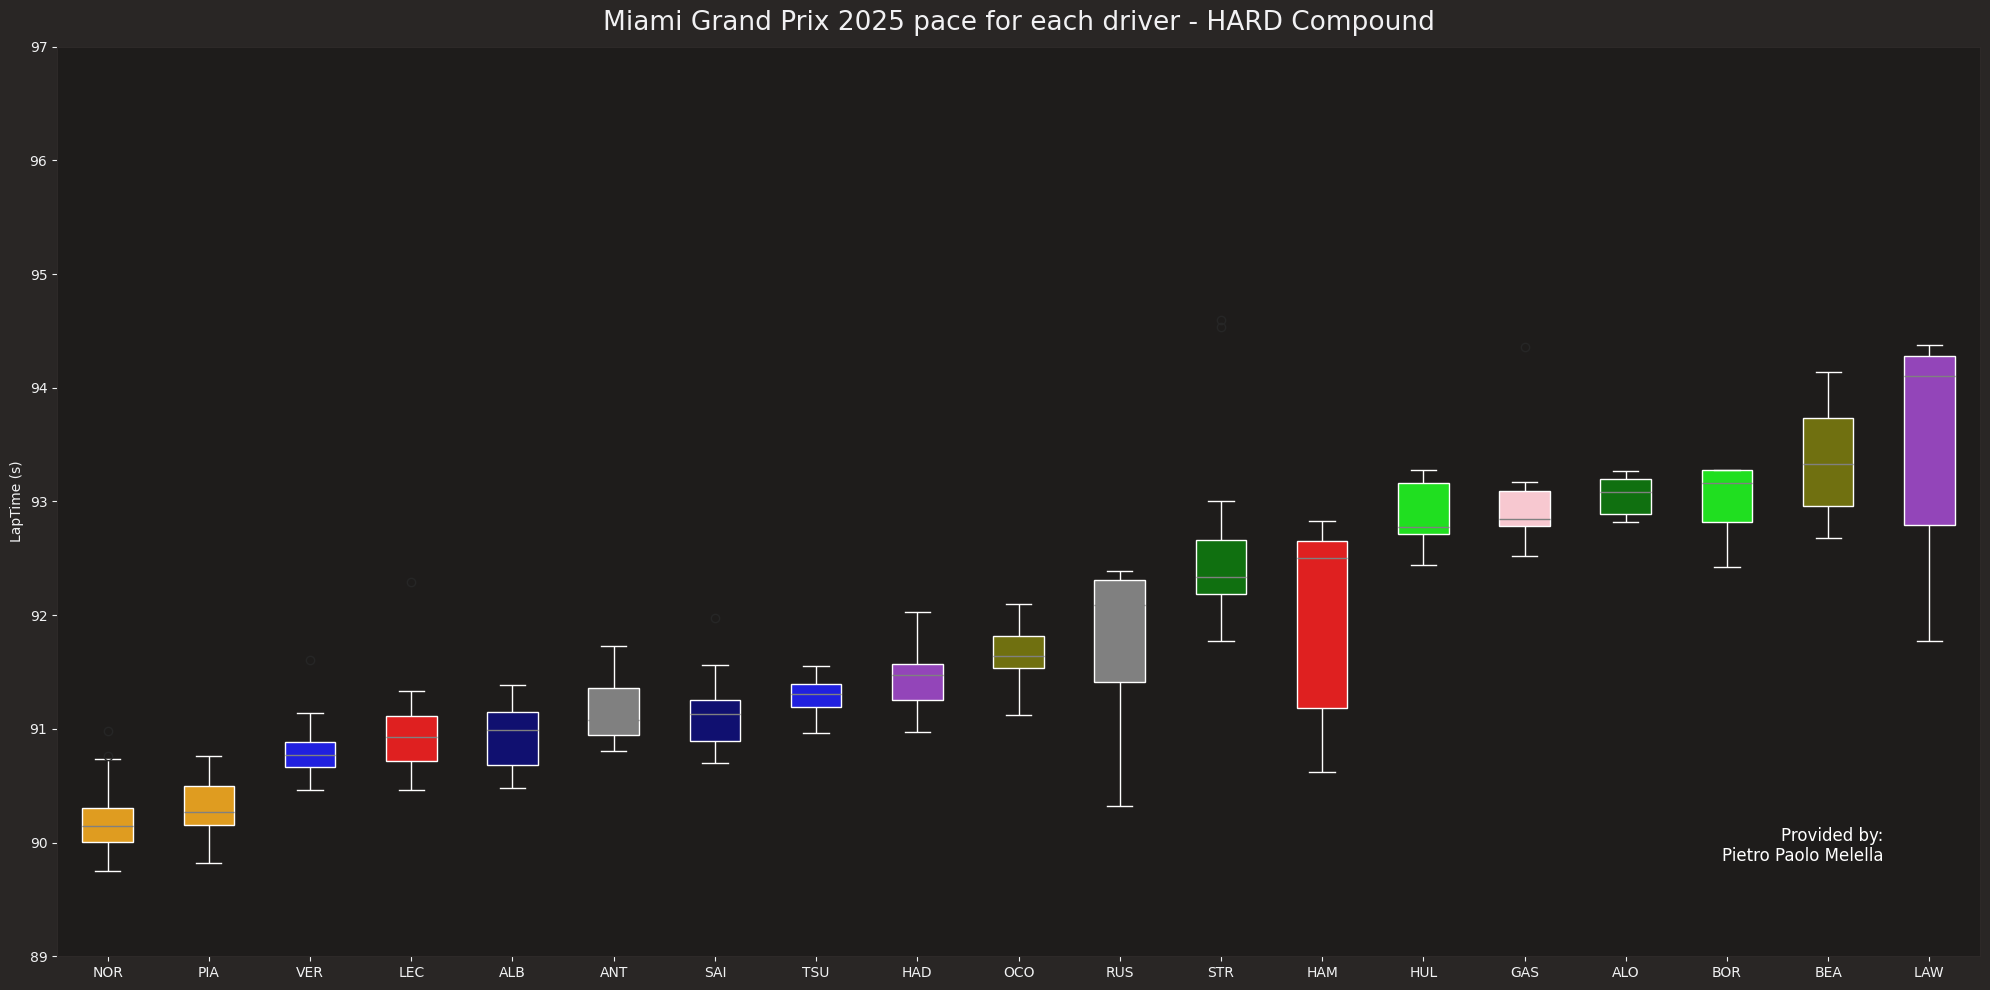

In [42]:
# Define the function to generate the plot for a given compound
def plot_lap_times_for_compound(compound, transformed_laps, colors):
    transformed_laps_with_compound = transformed_laps[transformed_laps['Compound'] == compound]
    transformed_laps_with_compound.reset_index(drop=True, inplace=True)
    median_lap_times_with_compound = transformed_laps_with_compound.groupby('Driver')['LapTime (s)'].median()
    sorted_drivers = median_lap_times_with_compound.sort_values().index

    fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
    sns.boxplot(
    data=transformed_laps_with_compound,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend since it would be redundant
)

    plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

    plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver - {compound} Compound")
    plt.grid(visible=False)
    ax.set(xlabel=None)
    # Set y-axis limit (based on data range, adjust accordingly)
    ax.set_ylim(89, 97)  # Example range, adjust based on your data
    plt.tight_layout()
    plt.show()

# Generate plots for each compound
for compound in compounds:
    plot_lap_times_for_compound(compound, transformed_laps, colors)

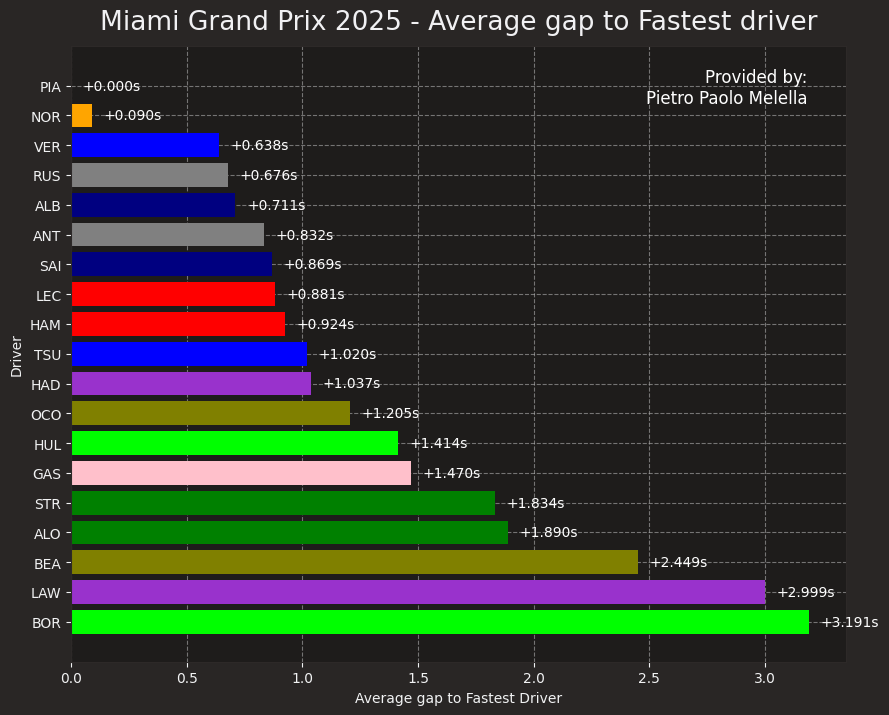

In [43]:
mean_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()

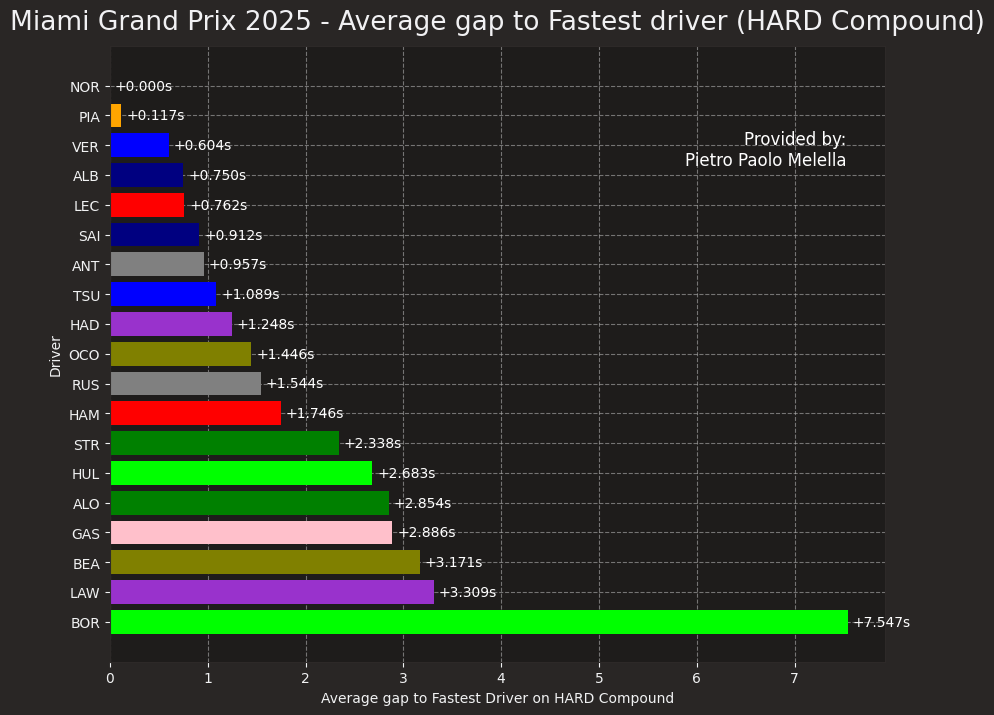

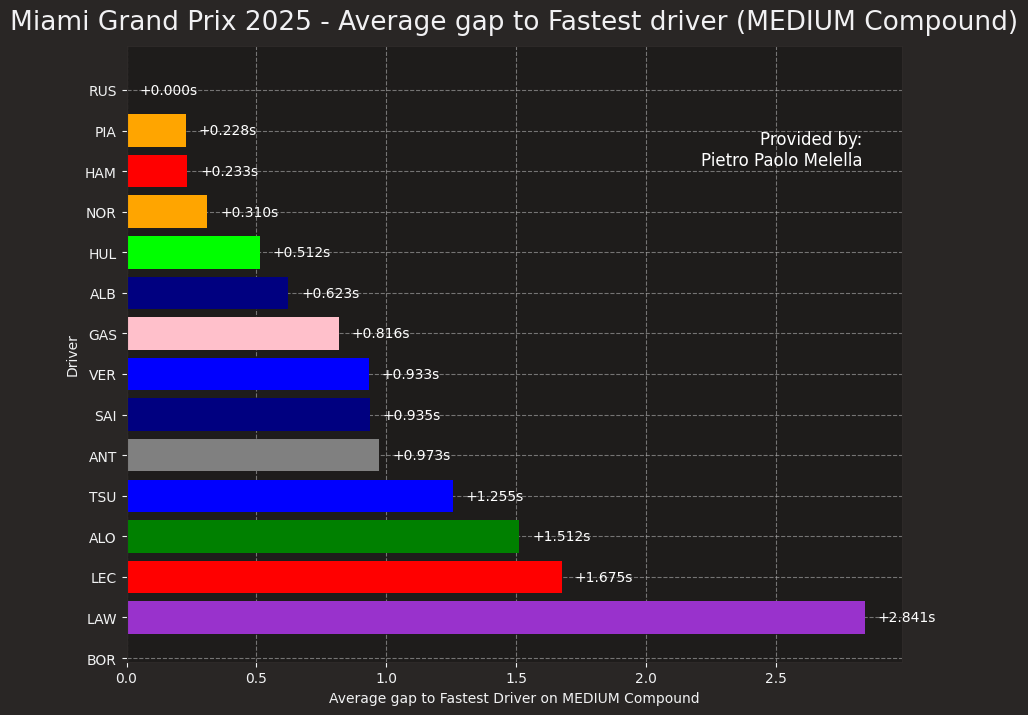

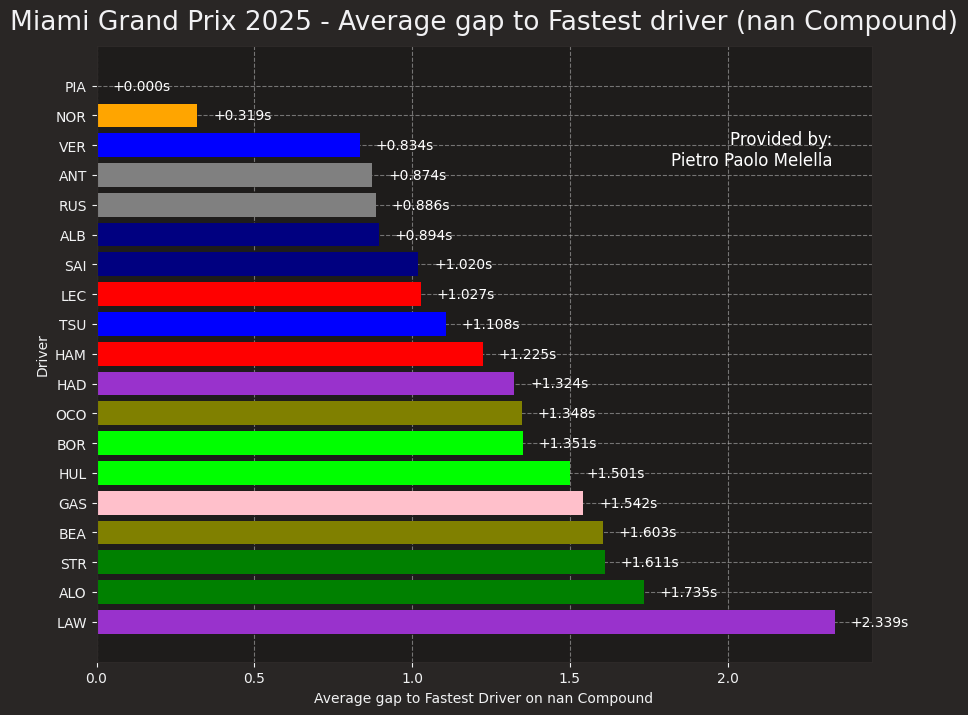

In [44]:
# Calculate mean lap times for each compound
mean_lap_times_per_compound = transformed_laps.groupby(['Driver', 'Compound'])['LapTime (s)'].mean().unstack()

# Iterate over each compound and create a separate plot
for compound in mean_lap_times_per_compound.columns:
    # Replace NaN values with a large number (indicating no lap times for that compound)
    mean_lap_times_per_compound[compound] = mean_lap_times_per_compound[compound].fillna(np.inf)

    # Find the fastest lap time for this compound (ignoring inf values)
    fastest_lap_time_compound = mean_lap_times_per_compound[compound][mean_lap_times_per_compound[compound] != np.inf].min()

    # Compute the gap from the fastest lap time for each driver (for this compound)
    gap_from_fastest_compound = mean_lap_times_per_compound[compound] - fastest_lap_time_compound

    # Sort the gaps for better visualization (fastest to slowest)
    gap_from_fastest_compound = gap_from_fastest_compound.sort_values(ascending=True)

    # Plot the data for this compound
    plt.figure(figsize=(10, 8))
    bars = plt.barh(gap_from_fastest_compound.index, gap_from_fastest_compound.values,
                    color=[colors[driver] for driver in gap_from_fastest_compound.index])
    plt.xlabel(f"Average gap to Fastest Driver on {compound} Compound")
    plt.ylabel("Driver")
    plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver ({compound} Compound)")

    plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

    # Add mean lap times as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        if np.isfinite(width):  # Ensure we only try to plot finite values
            plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
                     va='center', ha='left', color='white', fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().invert_yaxis()  # To display the fastest on top
    plt.show()

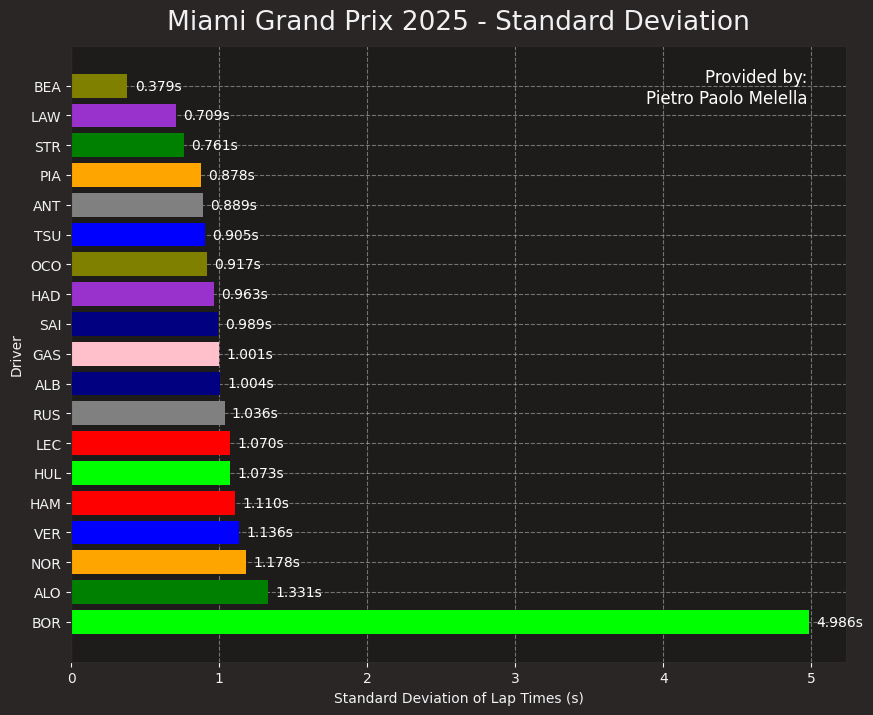

In [45]:
# Calculate the standard deviation of lap times for each driver
std_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].std()

# Sort the standard deviation values for better visualization (lowest to highest)
std_lap_times_sorted = std_lap_times.sort_values(ascending=True)

# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(std_lap_times_sorted.index, std_lap_times_sorted.values, 
                color=[colors[driver] for driver in std_lap_times_sorted.index])
plt.xlabel("Standard Deviation of Lap Times (s)")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Standard Deviation")

# Add standard deviation values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the most consistent drivers on top
plt.show()